In [1]:
import numpy as np
import matplotlib.pyplot as plt

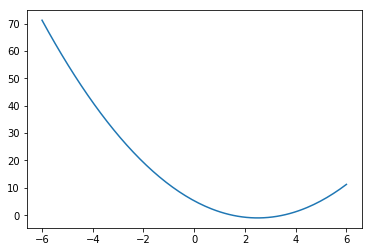

-8580.857142857145

In [2]:
x = np.linspace(-6,6,141)
plot_y = (x - 2.5)**2 - 1
plt.plot(x,plot_y)
plt.show()
x.dot(plot_y)


In [3]:
def dJ(theta):
    return (theta - 2.5) *2

In [4]:
def J(theta):
    return (theta - 2.5)**2 - 1

In [5]:
def Gradient():
    eta = 0.1 
    theta = 0.0
    epslion = 1e-8 
    while True:
        gradient = dJ(theta)
        theta_last = theta 
        theta =  theta - eta* gradient
        
        if( abs(J(theta) -  J(theta_last))<epslion ):
            break
        
    print "best theta is ", theta
    print "best J(theta) is ", J(theta)

best theta is  2.49989110964
best J(theta) is  -0.999999988143


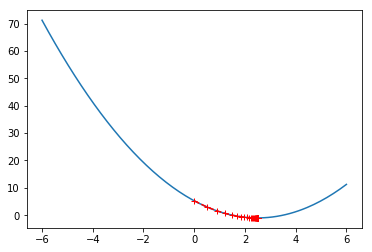

In [6]:
eta     = 0.1 
theta   = 0.0
epslion = 1e-8
theta_history  = [theta]

while True:
    gradient   =  dJ(theta)
    theta_last =  theta 
    theta      =  theta - eta* gradient
    theta_history.append(theta)
    if(abs(J(theta) -  J(theta_last))<epslion ):
        break
        
print "best theta is ", theta
print "best J(theta) is ", J(theta)
plt.plot(x, J(x))
plt.plot(np.array(theta_history),J(np.array(theta_history)),color = 'r',marker = '+',linestyle = 'dashed')
plt.show()

In [7]:
len(theta_history)

46

In [8]:
def gradient_descent(intial_theta,eta,n_iters = 1e4,epslion = 1e-8):
    theta = intial_theta
    theta_history.append(intial_theta)
    i_iters = 0
    while i_iters < n_iters:  # 循环一万次
        gradient = dJ(theta)
        theta_last = theta 
        theta =  theta - eta* gradient
        theta_history.append(theta)
        if(abs(J(theta) -  J(theta_last))<epslion ):
            break
        i_iters += 1

def plot_theta_history():
    plt.plot(x, J(x),linewidth =  3.0)
    plt.plot(np.array(theta_history),J(np.array(theta_history)),color = 'r',marker = '+',linestyle = 'dashed')
    plt.show()

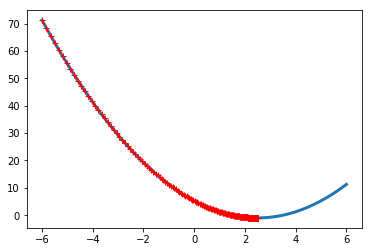

In [9]:
intial_theta  = x[0]
learning_rate = 0.01  # experience value
eta           = learning_rate
theta_history = []
gradient_descent(intial_theta,eta)
plot_theta_history()

In [10]:
len(theta_history)

484

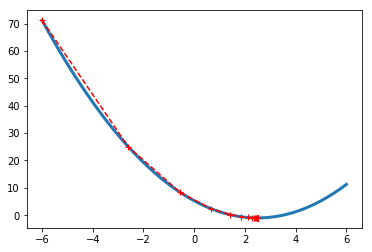

In [11]:
intial_theta  = x[0]
learning_rate = 0.2
eta           = learning_rate
theta_history = []
gradient_descent(intial_theta,eta)
plot_theta_history()

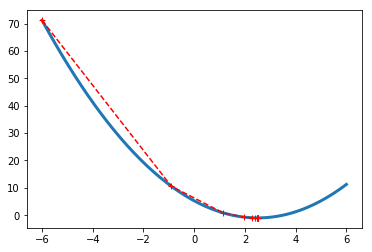

In [12]:
intial_theta  = x[0]
learning_rate = 0.3
eta           = learning_rate
theta_history = []
gradient_descent(intial_theta,eta)
plot_theta_history()

In [13]:
len(theta_history)

15

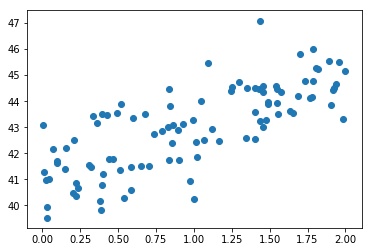

In [22]:
import numpy as np
import matplotlib.pyplot as plt 
np.random.seed(666)
x =  2 *np.random.random(size = 100)
y =  x*2 + 41  + np.random.normal(size = 100)
x = x.reshape(-1,1)
#y = y.reshape(-1,1)
plt.scatter(x,y)
plt.show()

In [15]:
x.shape

(100L, 1L)

In [16]:
y.shape

(100L,)

### 批度梯度下降法 - BatchGradientDescent 
#### 批度学习下降法的可以将批量的数据进行迭代来快速找打最优的点，目标明确但是需要时间成本

In [17]:
# 多项式线性回归中的梯队下降法的实现
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2)/len(X_b)
    except:
        return float('inf')

def dJ(theta, X_b,y):
    res    = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)

    for i in range(1, len(theta)):  #取不到 len(theta)
        res[i] =  (X_b.dot(theta) - y).dot(X_b[:,i])
        
        '''print "X_b.shape",X_b.shape
        print "theta.shape", theta.shape
        print "X_b.dot(theta)",X_b.dot(theta).shape
        print "-------------"'''
    return res * 2/len(X_b)

In [18]:
def gradient_descent(X_b,y,intial_theta,eta,n_iters = 1e4,epslion = 1e-8):
    theta = intial_theta
   
    i_iters = 0
    while i_iters < n_iters:  # 循环一万次
        gradient   = dJ(theta,X_b,y)
        theta_last = theta 
        theta      = theta - eta* gradient
        
        if(abs(J(theta,X_b,y) -  J(theta_last,X_b,y))<epslion ):
            break
        
        i_iters += 1  
    return theta

In [36]:
# 将X_b组合成两列
X_b  = np.hstack ([np.ones((len(x),1)), x])  # horist - 水平方向
X_b.shape

(100L, 2L)

In [45]:
intial_theta = np.zeros(X_b.shape[1])
eta          = 0.001 

In [46]:
%time theta = gradient_descent(X_b,y,intial_theta,eta)
theta

Wall time: 648 ms


array([40.2567256 ,  2.65206858])

### 随机梯度下降法 - Stochastic GradientDescent
#### 随机梯度下降法，每次只取一个样本来做梯度下降，迭代速度快但也会向最优话的方向逼近，会有波动
#### 而且每次learning rate会跟迭代次数相关

In [58]:
# learning rate 
def learning_rate(iters):
    t0 = 5
    t1 = 30
    rate = t0/(t1 + iters)
    return rate

# stochastic dJ
def stochastic_dJ(X_b_i,theta,y_i):
    return 2*X_b_i.T.dot(X_b_i.dot(theta) - y_i)

# stochastic greaddescent
def stochastic_gradientdescent(X_b,y,init_theta,n_iters):
    theta              = init_theta
    for iters in range(n_iters):
        randomexampleindex = np.random.randint(len(X_b))
        gradient = stochastic_dJ(X_b[randomexampleindex],theta,y[randomexampleindex]) 
        theta    = theta - learning_rate(iters)* gradient
    return theta,gradient

In [59]:
%%time 
n_iters          = int(n_iters)
theta,gradient   = stochastic_gradientdescent(X_b,y,init_theta,n_iters)

Wall time: 102 ms


In [55]:
X_b.shape

(100L, 2L)

In [60]:
gradient

-128.82784287451648

In [56]:
y.shape

(100L,)